<a href="https://colab.research.google.com/github/jimilee/BaekJoon/blob/main/Covid19_pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycaret
!pip install pycaret-ts-alpha
import pandas as pd
import numpy as np
# from pycaret.datasets import get_data # data forcasting with pycaret.

     |████████████████████████████████| 301 kB 5.3 MB/s 
     |████████████████████████████████| 15.6 MB 32.3 MB/s 
     |████████████████████████████████| 2.0 MB 38.4 MB/s 
     |████████████████████████████████| 261 kB 44.7 MB/s 
     |████████████████████████████████| 86 kB 5.8 MB/s 
     |████████████████████████████████| 114 kB 47.6 MB/s 
     |████████████████████████████████| 6.8 MB 33.7 MB/s 
     |████████████████████████████████| 167 kB 44.2 MB/s 
     |████████████████████████████████| 1.7 MB 35.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.3 MB 40.0 MB/s 
     |████████████████████████████████| 56 kB 4.9 MB/s 
     |████████████████████████████████| 10.9 MB 35.6 MB/s 
     |████████████████████████████████| 303 kB 44.3 MB/s 
     |████████████████████████████████| 636 kB 27.0 MB/s 
     |████████████████

In [20]:
def get_origin_data(sr, p): # get origin from pre-processed data( log1p + diff )
  tmp = p
  org_list = []
  idx = sr.index
  for d in sr:
    org_list.append(tmp + d)
    tmp = tmp + d
  back = np.expm1(org_list)
  return pd.Series(back, idx)


Date
2021-07-11     1324.0
2021-07-12     1100.0
2021-07-13     1150.0
2021-07-14     1613.0
2021-07-15     1599.0
               ...   
2022-01-22     7007.0
2022-01-23     7628.0
2022-01-24     7512.0
2022-01-25     8571.0
2022-01-26    13012.0
Length: 200, dtype: float64
7.1891677384203225


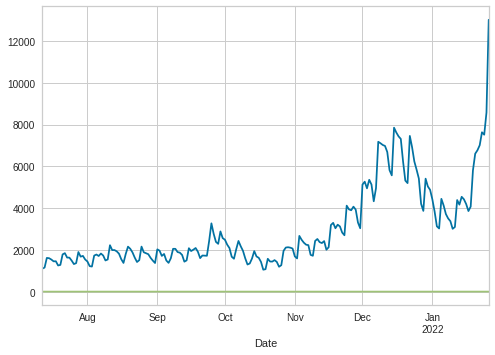

In [23]:

# Convert dataframe for pycaret.
covid_data_origin = pd.read_excel('/content/drive/MyDrive/코로나바이러스감염증-19_확진환자_발생현황_220126.xlsx', skiprows=range(4))
covid_data_origin = covid_data_origin.drop(0)
covid_data_origin.columns=['Date','Total','Domestic','Inflow','Death']
idx = pd.to_datetime(covid_data_origin['Date'])

total_list = covid_data_origin['Total'].replace(['-'],'0').astype(np.float64).tolist()
covid_data = pd.Series(total_list, idx)
covid_data = covid_data.iloc[len(covid_data)-200:] #최근 200일의 데이터만 추출!
print(covid_data)

covid_data_org = covid_data
# covid_data_org.plot()

covid_data = np.log1p(covid_data)
first = covid_data[0]
print(first)
covid_data = covid_data.diff().dropna()

covid_after = get_origin_data(covid_data, first)
covid_after.plot()

# plot the data
covid_data.plot()


In [39]:
# with functional API
from pycaret.time_series import *
setup(covid_data, fh = 7, fold = 3, session_id = 123)
# with new object-oriented API
from pycaret.internal.pycaret_experiment import TimeSeriesExperiment
exp = TimeSeriesExperiment()
exp.setup(covid_data, fh = 7, fold = 3, session_id = 123)

,Description,Value
0,session_id,123
1,Original Data,"(199, 1)"
2,Missing Values,False
3,Transformed Train Set,"(192,)"
4,Transformed Test Set,"(7,)"
5,Fold Generator,ExpandingWindowSplitter
6,Fold Number,3
7,Enforce Prediction Interval,False
8,Seasonal Period Tested,7
9,Seasonality Detected,True


INFO:logs:self.master_model_container: 0
INFO:logs:self.display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      float_dtype='float64', id_columns=[],
                                      ml_usecase='regression',
                                      numerical_features=[],
                                      target='Time Series', time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='most frequent',
                                fill_value_categorical='not_available',
                                fill_v...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
                ('dummy', Dummif

In [40]:
check_stats()

,Test,Test Name,Property,Setting,Value
0,Summary,Statistics,Length,,199
1,Summary,Statistics,Mean,,0.0114801
2,Summary,Statistics,Median,,-0.030918
3,Summary,Statistics,Standard Deviation,,0.167715
4,Summary,Statistics,Variance,,0.0281284
5,Summary,Statistics,Kurtosis,,0.783161
6,Summary,Statistics,Skewness,,1.17381
7,Summary,Statistics,# Distinct Values,,199
8,White Noise,Ljung-Box,Test Statictic,"{'alpha': 0.05, 'K': 24}",518.099
9,White Noise,Ljung-Box,Test Statictic,"{'alpha': 0.05, 'K': 48}",960.383


In [42]:
# # functional API
plot_model(plot = 'ts')
# object-oriented API
exp.plot_model(plot = 'ts')

INFO:logs:Visual Rendered Successfully


INFO:logs:Visual Rendered Successfully


In [43]:
# cross-validation plot
plot_model(plot = 'cv')

INFO:logs:Visual Rendered Successfully


In [44]:
# ACF plot
plot_model(plot = 'acf')

INFO:logs:Visual Rendered Successfully


In [45]:
# Diagnostics plot
plot_model(plot = 'diagnostics')

INFO:logs:Visual Rendered Successfully


In [46]:
# Decomposition plot
plot_model(plot = 'decomp_stl')

INFO:logs:Visual Rendered Successfully


In [47]:
# functional API
best = compare_models()
# object-oriented API
best = exp.compare_models()

,Model,MAE,RMSE,MAPE,SMAPE,MASE,R2,TT (Sec)
arima,ARIMA,0.0507,0.0649,0.8235,0.6233,0.6316,0.8074,0.0867
snaive,Seasonal Naive Forecaster,0.0502,0.0642,0.8103,0.6235,0.6251,0.811,0.0233
dt_cds_dt,Decision Tree w/ Cond. Deseasonalize & Detrending,0.0626,0.083,0.9935,0.7052,0.7817,0.6652,0.0367
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,0.0422,0.0505,0.6278,0.7724,0.5255,0.8865,0.1467
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Det...,0.0416,0.0502,0.6465,0.7846,0.5176,0.8905,0.0967
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize...,0.0475,0.0557,0.752,0.7887,0.5907,0.8632,0.0533
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,0.0425,0.0489,0.6567,0.86,0.5303,0.8921,0.7267
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,0.0445,0.0525,0.6502,0.8776,0.5545,0.8747,0.6900
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,0.0456,0.0512,0.6653,0.9002,0.5677,0.8826,0.0500
auto_arima,Auto ARIMA,0.0471,0.057,0.6497,0.9067,0.586,0.8583,22.1767


INFO:logs:master_model_container: 26
INFO:logs:display_container: 2
INFO:logs:ARIMA(maxiter=50, method='lbfgs', order=(1, 0, 0), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 1, 0, 7),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=True)
INFO:logs:compare_models() successfully completed......................................


In [32]:
# create fbprophet model
prophet = create_model('prophet')
print(prophet)

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,R2
0,2021-12-17,0.0616,0.0725,0.9434,1.1629,0.7346,0.7811
1,2021-12-27,0.0511,0.0601,0.5886,1.0317,0.6223,0.8973
2,2022-01-06,0.0464,0.0552,0.7546,1.0767,0.5826,0.8151
Mean,NaT,0.0530,0.0626,0.7622,1.0904,0.6465,0.8312
SD,NaT,0.0064,0.0073,0.1449,0.0544,0.0643,0.0488


INFO:logs:master_model_container: 27
INFO:logs:display_container: 3
INFO:logs:ProphetPeriodPatched(add_country_holidays=None, add_seasonality=None,
                     alpha=0.05, changepoint_prior_scale=0.05,
                     changepoint_range=0.8, changepoints=None,
                     daily_seasonality='auto', freq=None, growth='linear',
                     holidays=None, holidays_prior_scale=10.0, mcmc_samples=0,
                     n_changepoints=25, seasonality_mode='additive',
                     seasonality_prior_scale=10.0, stan_backend=None,
                     uncertainty_samples=1000, verbose=0,
                     weekly_seasonality='auto', yearly_seasonality='auto')
INFO:logs:create_model() successfully completed......................................


ProphetPeriodPatched(add_country_holidays=None, add_seasonality=None,
                     alpha=0.05, changepoint_prior_scale=0.05,
                     changepoint_range=0.8, changepoints=None,
                     daily_seasonality='auto', freq=None, growth='linear',
                     holidays=None, holidays_prior_scale=10.0, mcmc_samples=0,
                     n_changepoints=25, seasonality_mode='additive',
                     seasonality_prior_scale=10.0, stan_backend=None,
                     uncertainty_samples=1000, verbose=0,
                     weekly_seasonality='auto', yearly_seasonality='auto')


In [33]:
tuned_prophet = tune_model(prophet)
print(tuned_prophet)

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,R2
0,2021-12-17,0.0788,0.0871,1.2727,1.2756,0.9387,0.6838
1,2021-12-27,0.0363,0.0448,0.3943,0.3457,0.4422,0.9431
2,2022-01-06,0.0532,0.0644,0.8602,1.0704,0.6675,0.7480
Mean,NaT,0.0561,0.0654,0.8424,0.8972,0.6828,0.7916
SD,NaT,0.0175,0.0173,0.3588,0.3989,0.2030,0.1103


INFO:logs:master_model_container: 30
INFO:logs:display_container: 4
INFO:logs:ProphetPeriodPatched(add_country_holidays=None, add_seasonality=None,
                     alpha=0.05, changepoint_prior_scale=0.0016825782489797434,
                     changepoint_range=0.8, changepoints=None,
                     daily_seasonality='auto', freq=None, growth='linear',
                     holidays=None, holidays_prior_scale=1.3708519184706216,
                     mcmc_samples=0, n_changepoints=25,
                     seasonality_mode='multiplicative',
                     seasonality_prior_scale=0.8002079756292472,
                     stan_backend=None, uncertainty_samples=1000, verbose=0,
                     weekly_seasonality='auto', yearly_seasonality='auto')
INFO:logs:tune_model() succesfully completed......................................


ProphetPeriodPatched(add_country_holidays=None, add_seasonality=None,
                     alpha=0.05, changepoint_prior_scale=0.0016825782489797434,
                     changepoint_range=0.8, changepoints=None,
                     daily_seasonality='auto', freq=None, growth='linear',
                     holidays=None, holidays_prior_scale=1.3708519184706216,
                     mcmc_samples=0, n_changepoints=25,
                     seasonality_mode='multiplicative',
                     seasonality_prior_scale=0.8002079756292472,
                     stan_backend=None, uncertainty_samples=1000, verbose=0,
                     weekly_seasonality='auto', yearly_seasonality='auto')


In [34]:
plot_model(best, plot = 'forecast')

INFO:logs:Visual Rendered Successfully


In [48]:
# forecast in unknown future
plot_model(best, plot = 'forecast', data_kwargs = {'fh' : 30})


INFO:logs:Visual Rendered Successfully


In [49]:
# in-sample plot
plot_model(best, plot = 'insample')

INFO:logs:Visual Rendered Successfully


In [50]:
# residuals plot
plot_model(best, plot = 'residuals')

INFO:logs:Visual Rendered Successfully


In [51]:
# diagnostics plot
plot_model(best, plot = 'diagnostics')

INFO:logs:Visual Rendered Successfully


INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(self=<pycaret.internal.pycaret_experiment.time_series_experiment.TimeSeriesExperiment object at 0x7f412ef10f10>, estimator=ARIMA(maxiter=50, method='lbfgs', order=(1, 0, 0), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 1, 0, 7),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=True), fit_kwargs=None, groups=None, model_only=True, display=None)
INFO:logs:Finalizing ARIMA(maxiter=50, method='lbfgs', order=(1, 0, 0), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 1, 0, 7),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=True)
INFO:logs:Initializing create_model()
INFO:logs:create_model(self=<pycaret.internal.pycaret_experiment.time_series_experiment.TimeSeriesExperiment object at 0x7f412ef10f10>, estimator=ARIMA(maxiter=50, method='lbfgs', order=(1, 0, 0), out_of_sample_size=0,
      scor

2021-07-12   -0.185194
2021-07-13    0.044412
2021-07-14    0.338084
2021-07-15   -0.008712
2021-07-16   -0.040822
                ...   
2022-03-03    0.145100
2022-03-04    0.047400
2022-03-05    0.056900
2022-03-06    0.107000
2022-03-07    0.006700
Length: 239, dtype: float64
=====


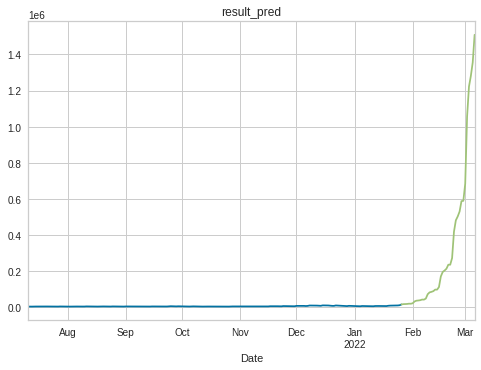

In [52]:
# finalize model
final_best = finalize_model(best)
# generate predictions
pred = predict_model(final_best, fh = 40)
pred.index = pred.index.to_timestamp()
res = pd.concat([covid_data, pred], axis = 0)

print(res)
print('=====')
result_data = get_origin_data(res, first)[len(covid_data)-1:-1]
covid_data_org.plot()
result_data.plot(title='result_pred')

In [53]:
# save the model
save_model(final_best, 'my_best_model')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=ARIMA(maxiter=50, method='lbfgs', order=(1, 0, 0), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 1, 0, 7),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=True), model_name=my_best_model, prep_pipe_=None, verbose=True, kwargs={})
INFO:logs:Adding model into prep_pipe
INFO:logs:my_best_model.pkl saved in current working directory
INFO:logs:ARIMA(maxiter=50, method='lbfgs', order=(1, 0, 0), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 1, 0, 7),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=True)
INFO:logs:save_model() successfully completed......................................


Transformation Pipeline and Model Successfully Saved


(ARIMA(maxiter=50, method='lbfgs', order=(1, 0, 0), out_of_sample_size=0,
       scoring='mse', scoring_args=None, seasonal_order=(0, 1, 0, 7),
       start_params=None, suppress_warnings=False, trend=None,
       with_intercept=True), 'my_best_model.pkl')